In [1]:
from PIL import Image 
from pylab import *

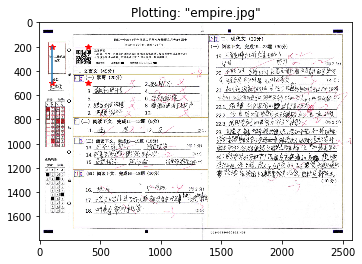

In [7]:
# 读取图像到数组中
im = array(Image.open('img/aa.png'))
# 绘制图像 
imshow(im)
# 一些点 
x = [100,100,400,400] 
y = [200,500,200,500]
# 使用红色星状标记绘制点
plot(x,y,'r*')
# 绘制连接前两个点的线 
plot(x[:2],y[:2])
# 添加标题，显示绘制的图像 
title('Plotting: "empire.jpg"')
#不显示坐标轴
#axis('off')

show()



In [5]:
x = [100,100,400,400] 
x[:2]

[100, 100]

(0.5, 2577.5, 0.5, 1792.5)

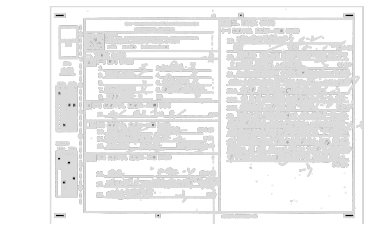

In [10]:
#图像的轮廓
#绘制轮廓需要对每个坐标 [x, y] 的 像素值施加同一个阈值 
#首先需要将图像灰度化
im = array(Image.open('img/aa.png').convert('L'))
# 新建一个图像
figure() 
# 不使用颜色信息 
gray() 
# 在原点的左上角显示轮廓图像 
contour(im, origin='image') 
axis('equal') 
axis('off')


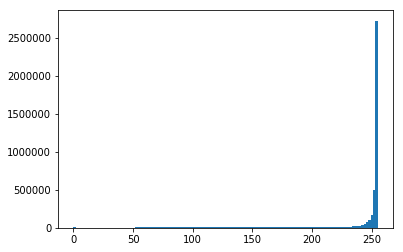

In [11]:
#直方图
#图像的直方图用来表征该图像像素值的分布情况
figure() 
#第二个参数指定小区间的数目
#因为 hist() 只接受一 维数组作为输入，所以我们在绘制图像直方图之前，必须先对图像进行压平处理
#flatten() 方法将任意数组按照行优先准则转换成一维数组
hist(im.flatten(),128)
show()

Please click 3 points


c:\users\thinking\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


you clicked: []


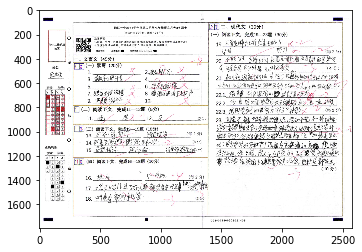

In [14]:
#交互式标注 
im = array(Image.open('img/aa.png'))
imshow(im)
print('Please click 3 points') 
x = ginput(3) 
print('you clicked:',x)
show()


In [15]:
im = array(Image.open('img/aa.png'))
print(im.shape, im.dtype) 
im = array(Image.open('img/aa.png').convert('L'), 'f')
print(im.shape, im.dtype) 
#行、列、颜色通道
#灰度图像没有颜色信息

(1793, 2578, 3) uint8
(1793, 2578) float32


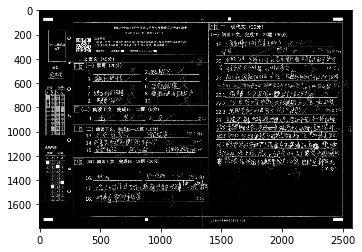

In [20]:
im = array(Image.open('img/aa.png').convert('L'))
im2 = 255 - im # 对图像进行反相处理
im3 = (100.0/255) * im + 100 # 将图像像素值变换到 100...200 区间
im4 = 255.0 * (im/255.0)**2 # 对图像像素值求平方后得到的图像 ,对图像使用二次函数变换，使较暗的像素值变得更小
imshow(im2)



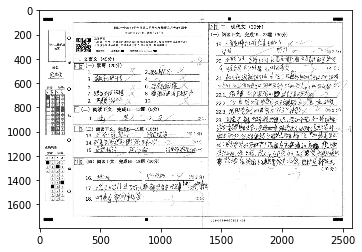

In [21]:
imshow(im3)


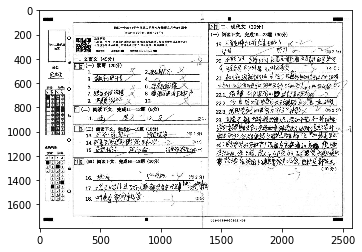

In [22]:
imshow(im4)

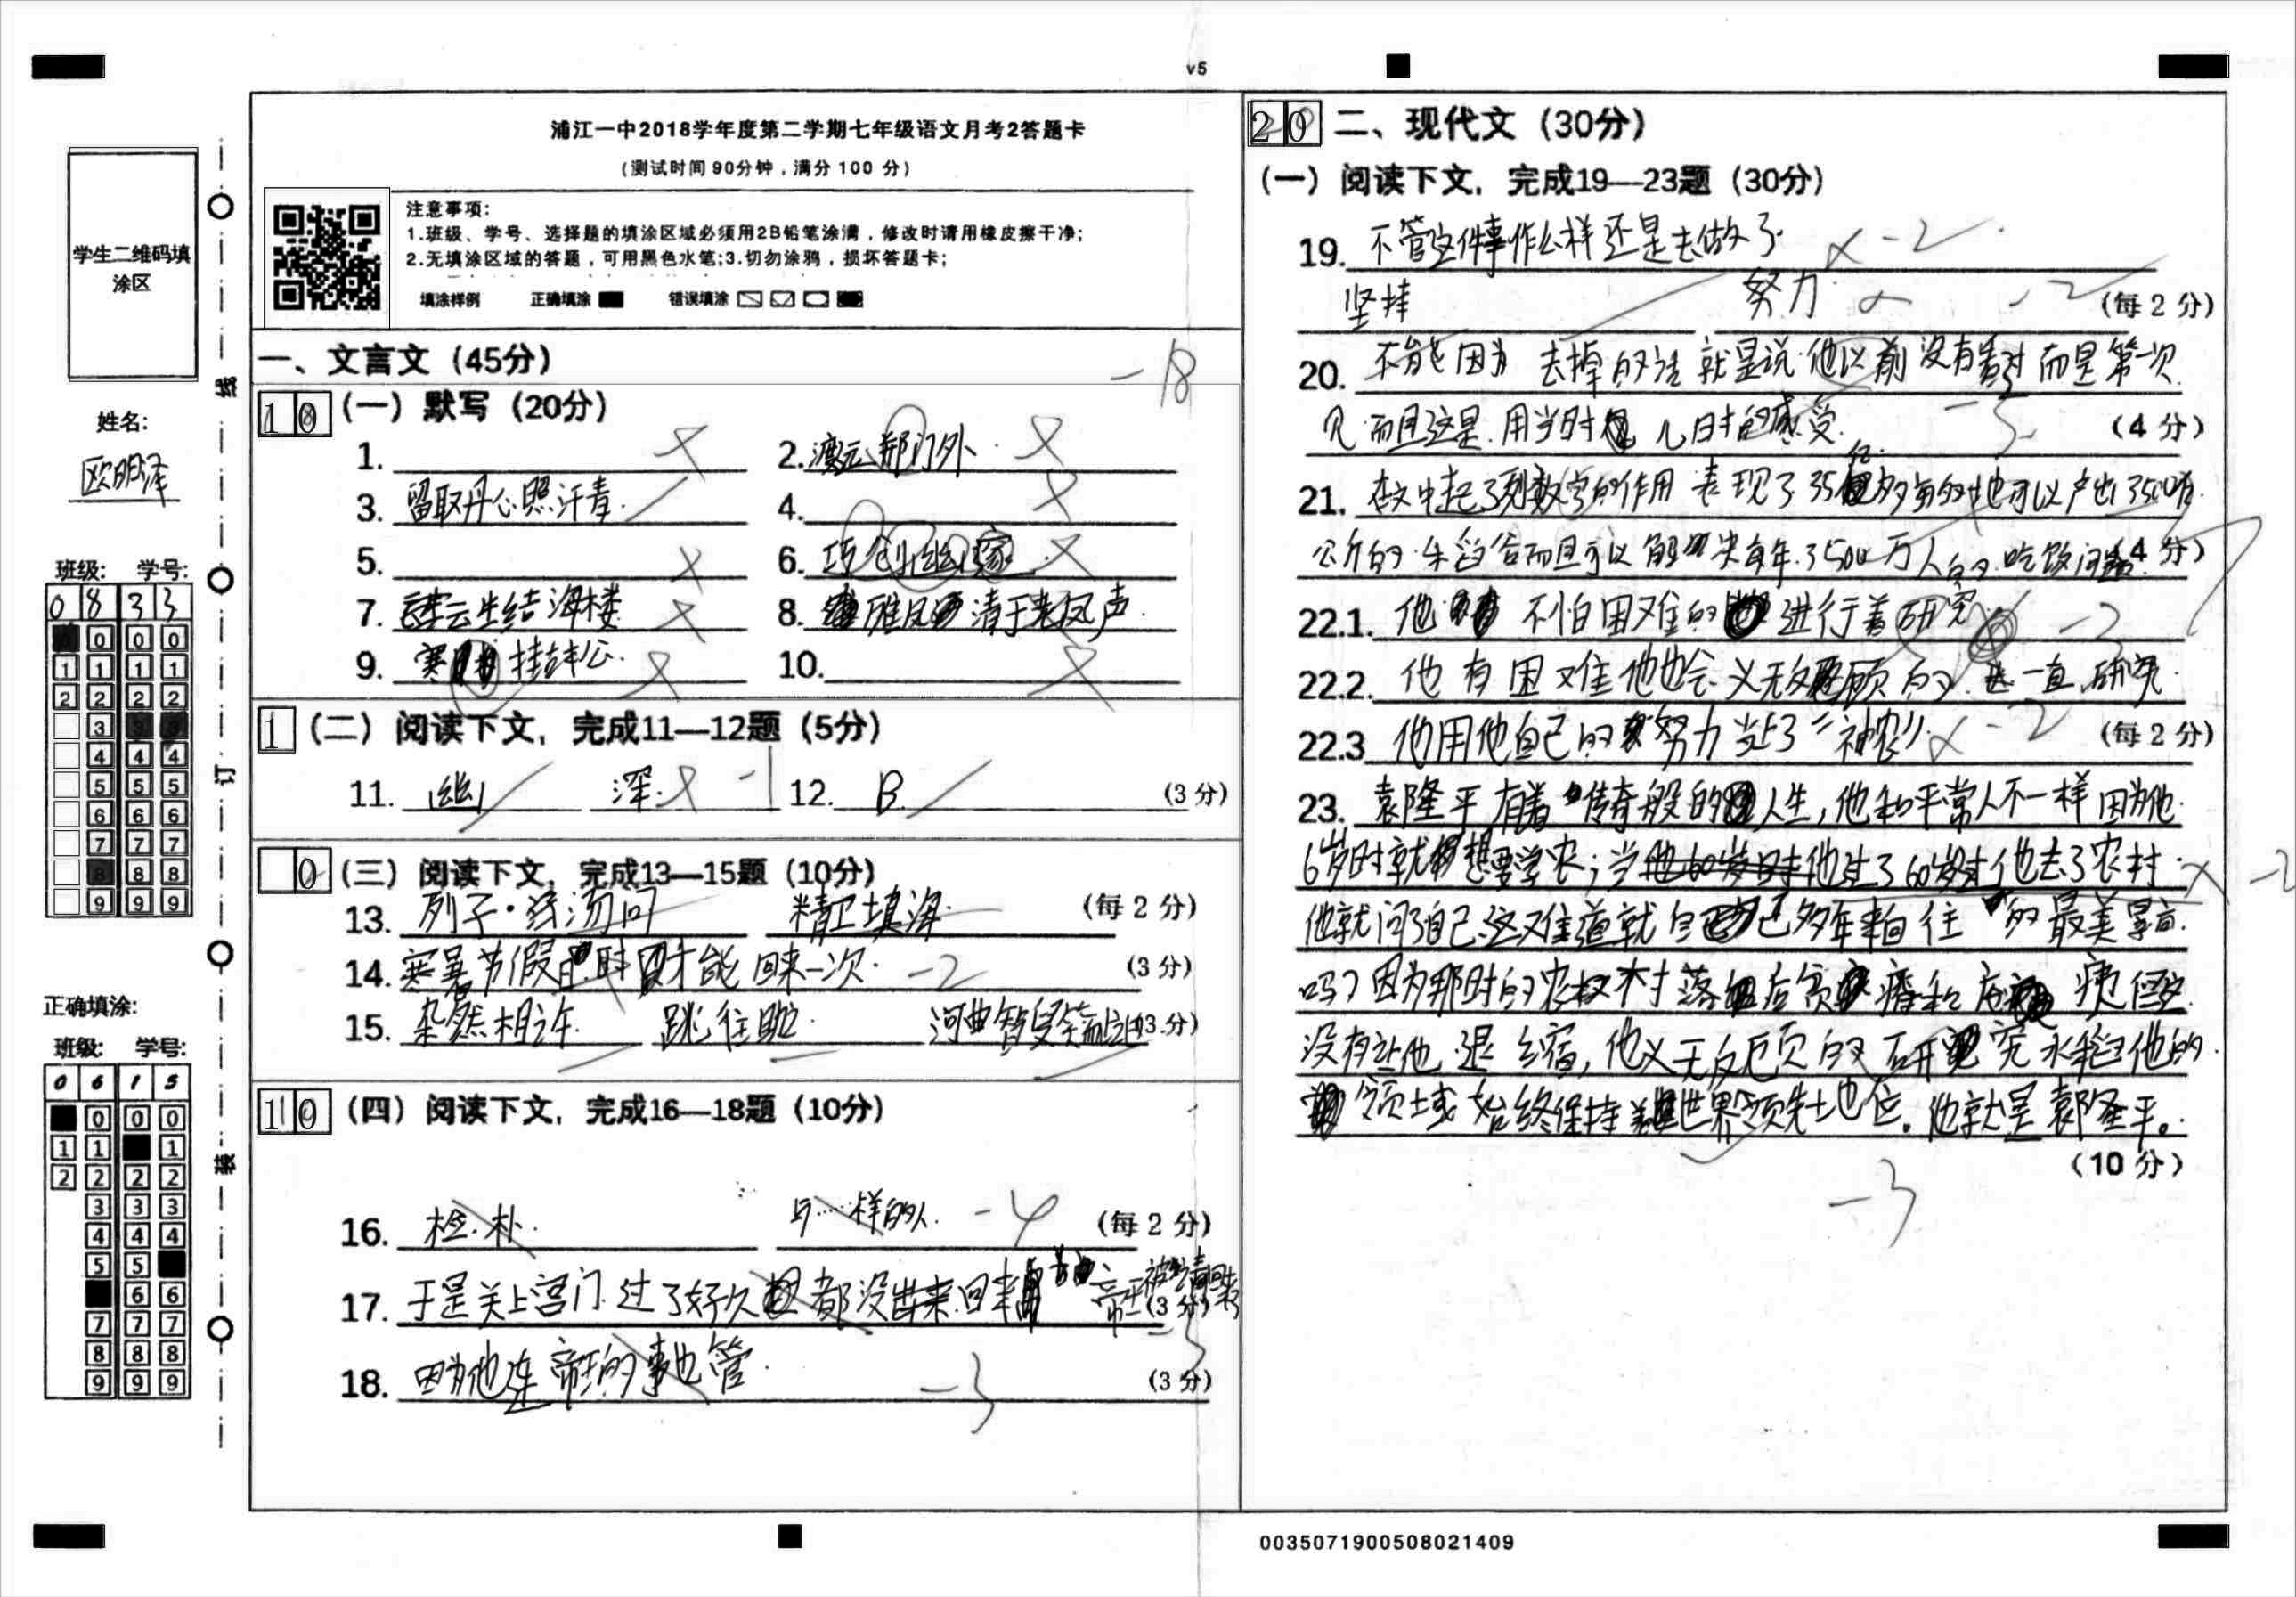

In [27]:
 Image.fromarray(uint8(im4))# 将图像从数组转回图像

In [30]:
#图像缩放
def imresize(im,sz):  
    """ 使用 PIL 对象重新定义图像数组的大小 """
    pil_im = Image.fromarray(uint8(im))
    return array(pil_im.resize(sz))

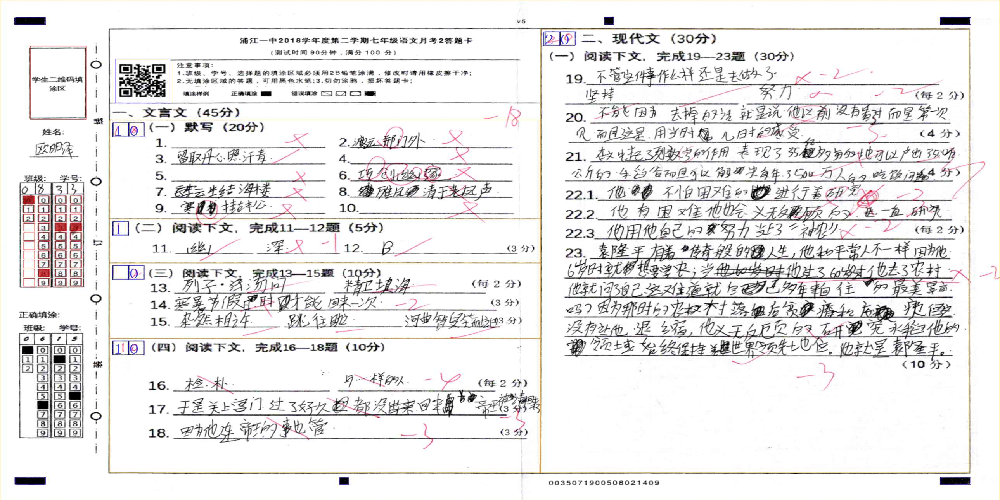

In [37]:
a=Image.open('img/aa.png')
Image.fromarray(uint8(imresize(a, (1000,500))))

In [38]:
#直方图均衡化 
#将一幅 图像的灰度直方图变平，使变换后的图像中每个灰度值的分布概率都相同，可以增强图像的对比度
#直方图均衡化的变换函数是图像中像素值的累积分布函数
#将像素值的范围映射到目标范围的归一化操作
#该函数有两个输入参数，一个是灰度图像，一个是直方图中使用小区间的数目。
def histeq(im,nbr_bins=256):  
    """ 对一幅灰度图像进行直方图均衡化 """
     # 计算图像的直方图  
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True) 
    cdf = imhist.cumsum() # cumulative distribution function  
    cdf = 255 * cdf / cdf[-1] # 归一化
    # 使用累积分布函数的线性插值，计算新的像素值  
    im2 = interp(im.flatten(),bins[:-1],cdf)
    return im2.reshape(im.shape), cdf

c:\users\thinking\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if __name__ == '__main__':


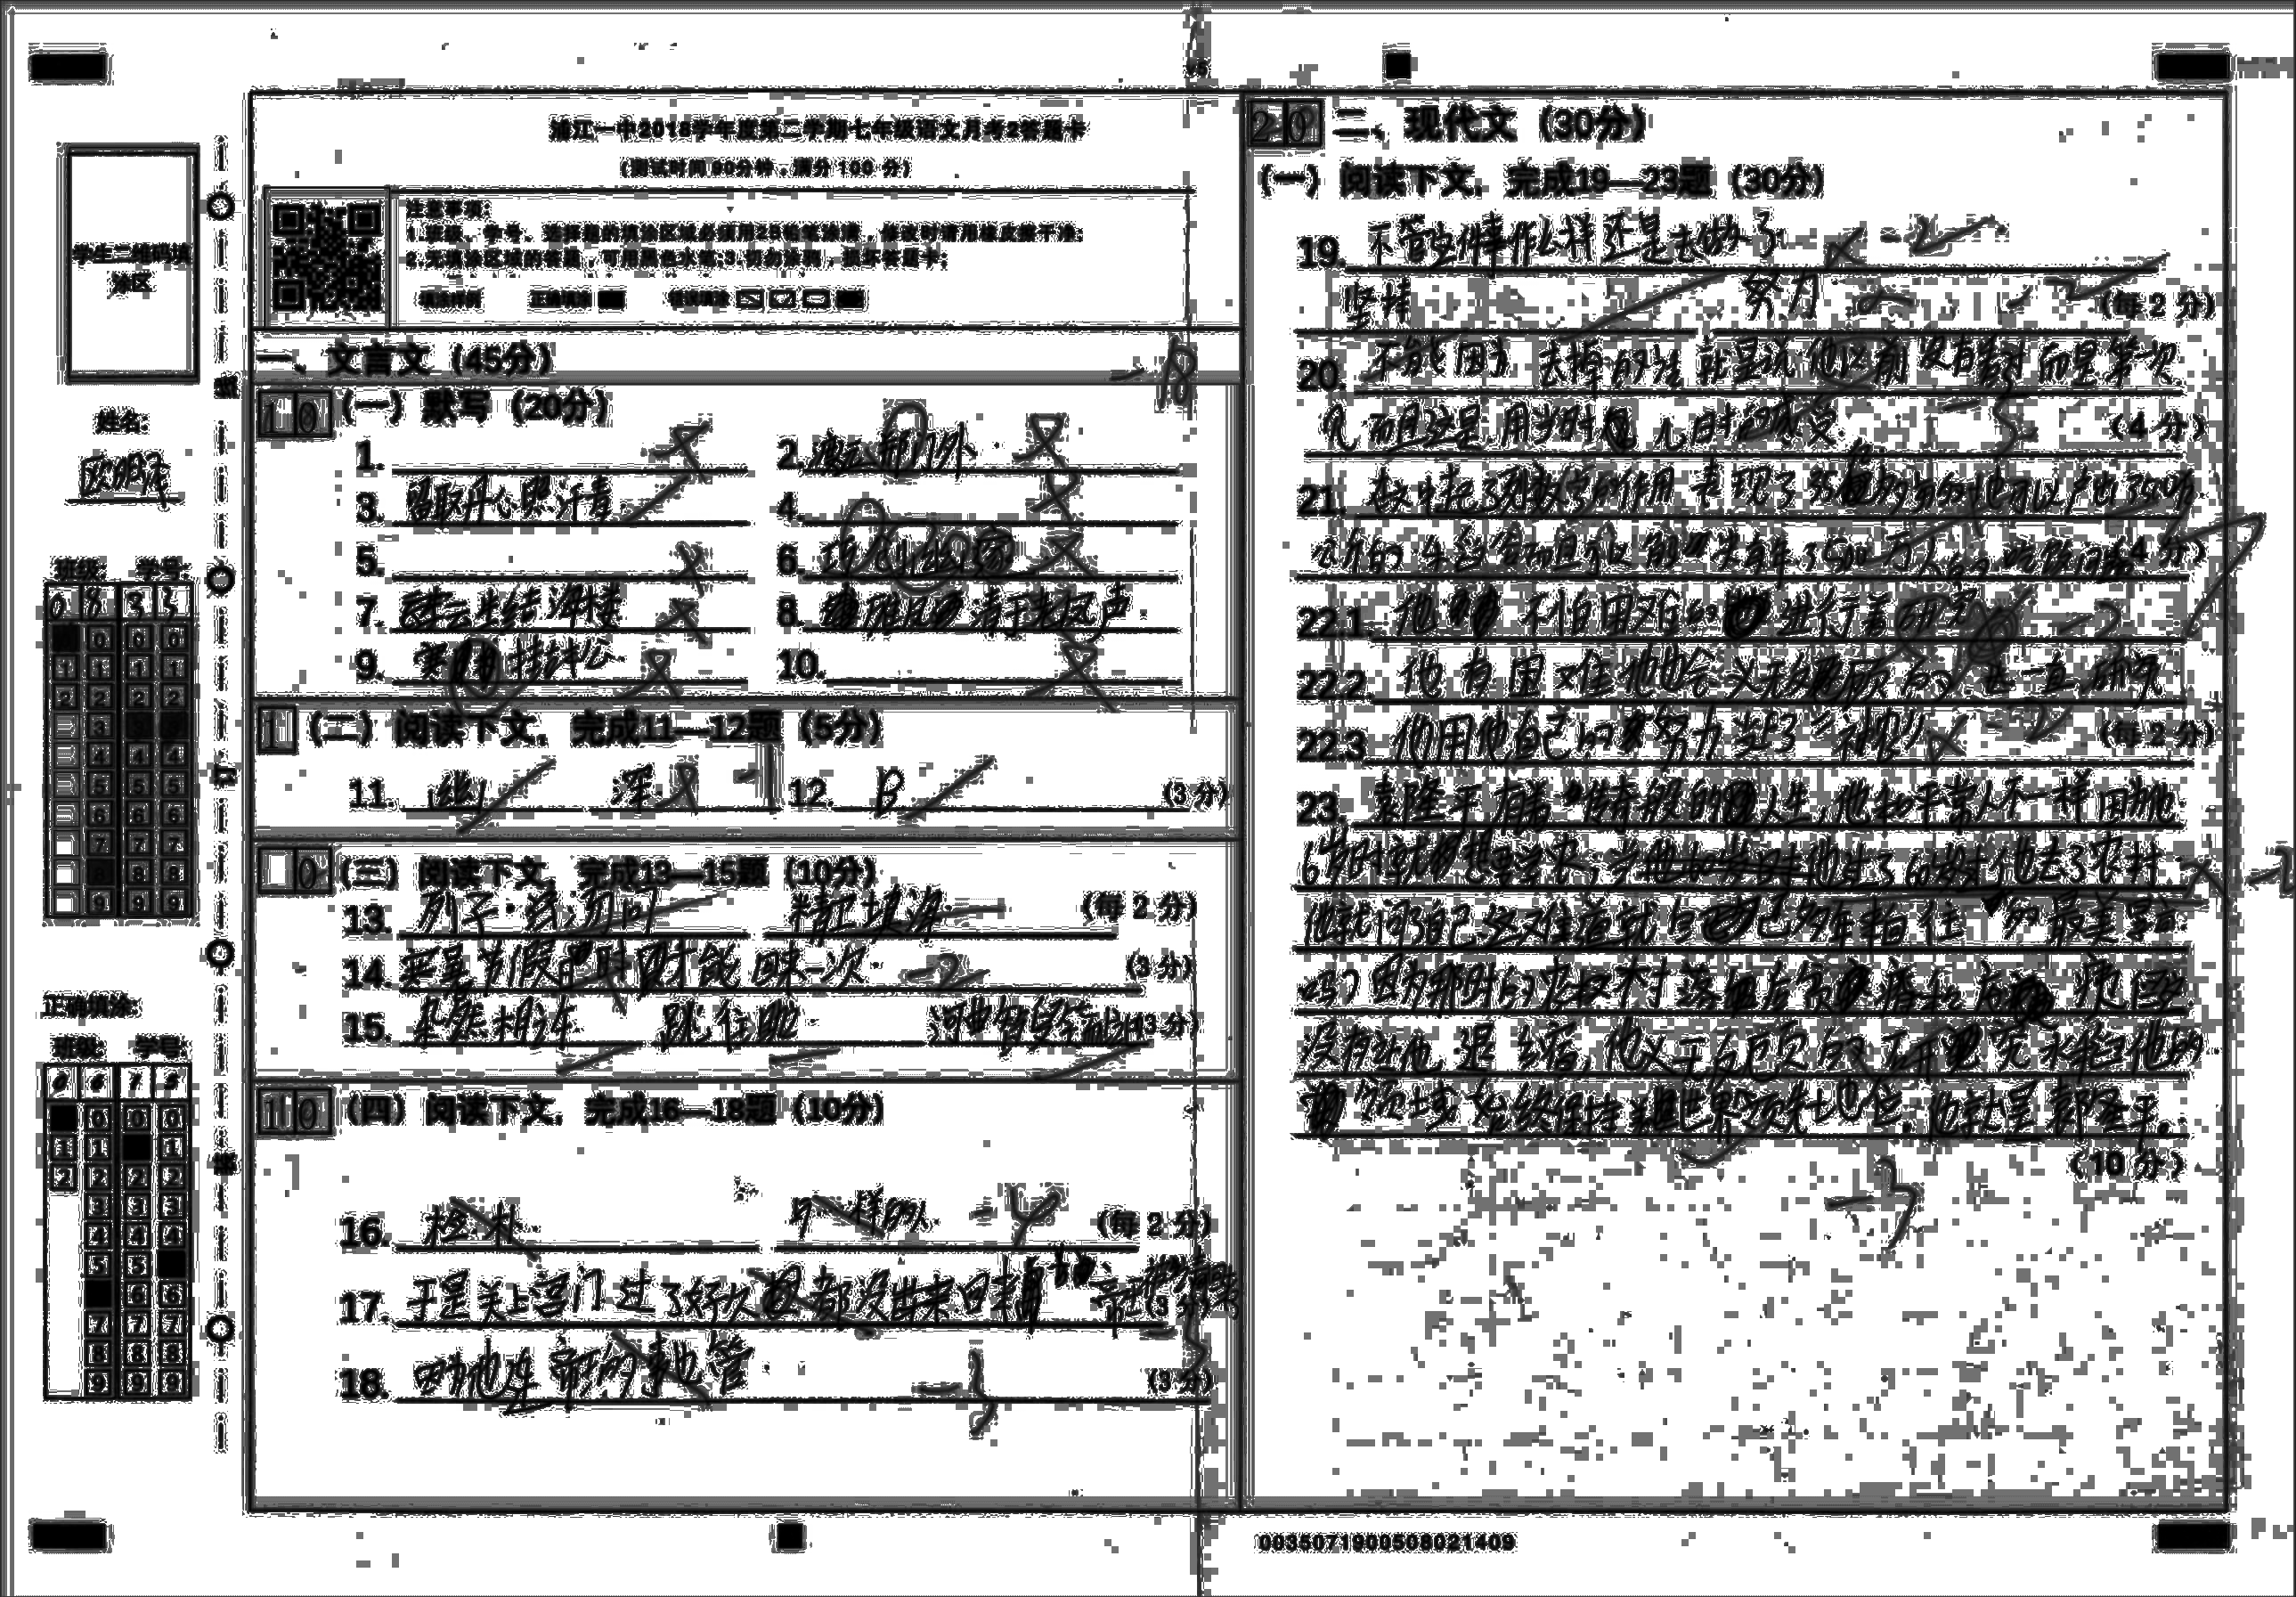

In [40]:
im = array(Image.open('img/aa.png').convert('L')) 
im2,cdf = histeq(im)
Image.fromarray(uint8(im2))

In [67]:
#图像平均操作是减少图像噪声的一种简单方式，通常用于艺术特效
def compute_average(imlist):
    """ 计算图像列表的平均图像 """
    # 打开第一幅图像，将其存储在浮点型数组中
    averageim = array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]:    
        try:      
            averageim += array(Image.open(imname))   
        except:     
            print (imname + '...skipped')
    averageim /= len(imlist)
    # 返回 uint8 类型的平均图像  
    return array(averageim, 'uint8')

In [68]:
from PIL import Image 
from numpy import *
def pca(X):  
    """ 主成分分析：    输入：矩阵 X ，其中该矩阵中存储训练数据，每一行为一条训练数据    返回：投影矩阵（按照维度的重要性排序）、方差和均值 """
    # 获取维数  num_data,dim = X.shape
    # 数据中心化  mean_X = X.mean(axis=0)  X = X - mean_X
    if dim>num_data:  
        # PCA- 使用紧致技巧  
        M = dot(X,X.T) 
        # 协方差矩阵  
        e,EV = linalg.eigh(M) 
        # 特征值和特征向量  
        tmp = dot(X.T,EV).T 
        # 这就是紧致技巧  
        V = tmp[::-1] 
        # 由于最后的特征向量是我们所需要的，所以需要将其逆转  
        S = sqrt(e)[::-1] 
        # 由于特征值是按照递增顺序排列的，所以需要将其逆转  
        for i in range(V.shape[1]):    
            V[:,i] /= S 
            
    else:  
        # PCA- 使用 SVD 方法  
        U,S,V = linalg.svd(X)  
        V = V[:num_data] # 仅仅返回前 nun_data 维的数据才合理
    # 返回投影矩阵、方差和均值 
    return V,S,mean_X